In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
critical_nitrogen = np.vectorize(lambda w: 0.187 * (w ** 0.63))

In [29]:
ziadi = pd.read_csv("Ziadi_2008.csv", parse_dates=["sampling dates"])
ziadi[["20", "50", "100", "150", "200", "250", "250s"]] *= 100 # unit conversion
ziadi

,site,sampling dates,CHU,20,50,100,150,200,250,250s,LSD,F test
0,st-louis,2004-07-06,976,143.0,124.0,154.0,146.0,144.0,132.0,157.0,0.20,§
1,st-louis,2004-07-13,1149,152.0,175.0,167.0,157.0,177.0,149.0,192.0,0.33,NS¶
2,st-louis,2004-07-20,1334,484.0,551.0,501.0,504.0,516.0,544.0,586.0,0.50,*
3,st-louis,2004-07-27,1494,671.0,758.0,789.0,723.0,742.0,793.0,807.0,0.93,NS
4,st-louis,2004-08-02,1656,859.0,967.0,972.0,958.0,1030.0,976.0,1138.0,1.05,*
5,st-louis,2004-08-09,1802,977.0,1018.0,1207.0,1125.0,1195.0,1166.0,1170.0,1.01,**
6,st-louis,2005-07-06,1034,126.0,138.0,132.0,152.0,150.0,134.0,149.0,0.26,NS
7,st-louis,2005-07-13,1206,282.0,236.0,291.0,312.0,324.0,294.0,369.0,0.81,NS
8,st-louis,2005-07-20,1410,383.0,452.0,527.0,523.0,507.0,567.0,589.0,0.74,**
9,st-louis,2005-07-27,1579,560.0,613.0,688.0,789.0,741.0,775.0,733.0,0.97,**


In [23]:
ziadi["time_since_planting"] = ziadi[ziadi["sampling dates"]  < pd.to_datetime("2005-01-01")]["sampling dates"] - pd.to_datetime("2004-05-15")
ziadi["time_since_planting"][ziadi["sampling dates"] > pd.to_datetime("2005-01-01")] = ziadi[ziadi["sampling dates"] > pd.to_datetime("2005-01-01")]["sampling dates"] - pd.to_datetime("2005-05-17")
ziadi

/tmp/nix-shell.Bh2h3q/ipykernel_1122991/1534049650.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ziadi["time_since_planting"][ziadi["sampling dates"] > pd.to_datetime("2005-01-01")] = ziadi[ziadi["sampling dates"] > pd.to_datetime("200

,site,sampling dates,CHU,20,50,100,150,200,250,250s,LSD,F test,time_since_planting
0,st-louis,2004-07-06,976,1.43,1.24,1.54,1.46,1.44,1.32,1.57,0.20,§,52 days
1,st-louis,2004-07-13,1149,1.52,1.75,1.67,1.57,1.77,1.49,1.92,0.33,NS¶,59 days
2,st-louis,2004-07-20,1334,4.84,5.51,5.01,5.04,5.16,5.44,5.86,0.50,*,66 days
3,st-louis,2004-07-27,1494,6.71,7.58,7.89,7.23,7.42,7.93,8.07,0.93,NS,73 days
4,st-louis,2004-08-02,1656,8.59,9.67,9.72,9.58,10.30,9.76,11.38,1.05,*,79 days
5,st-louis,2004-08-09,1802,9.77,10.18,12.07,11.25,11.95,11.66,11.70,1.01,**,86 days
6,st-louis,2005-07-06,1034,1.26,1.38,1.32,1.52,1.50,1.34,1.49,0.26,NS,50 days
7,st-louis,2005-07-13,1206,2.82,2.36,2.91,3.12,3.24,2.94,3.69,0.81,NS,57 days
8,st-louis,2005-07-20,1410,3.83,4.52,5.27,5.23,5.07,5.67,5.89,0.74,**,64 days
9,st-louis,2005-07-27,1579,5.60,6.13,6.88,7.89,7.41,7.75,7.33,0.97,**,71 days


In [31]:
ziadi["200_nc"] = critical_nitrogen(ziadi["200"])
ziadi

,site,sampling dates,CHU,20,50,100,150,200,250,250s,LSD,F test,200_nc
0,st-louis,2004-07-06,976,143.0,124.0,154.0,146.0,144.0,132.0,157.0,0.20,§,4.281638
1,st-louis,2004-07-13,1149,152.0,175.0,167.0,157.0,177.0,149.0,192.0,0.33,NS¶,4.876012
2,st-louis,2004-07-20,1334,484.0,551.0,501.0,504.0,516.0,544.0,586.0,0.50,*,9.567774
3,st-louis,2004-07-27,1494,671.0,758.0,789.0,723.0,742.0,793.0,807.0,0.93,NS,12.028073
4,st-louis,2004-08-02,1656,859.0,967.0,972.0,958.0,1030.0,976.0,1138.0,1.05,*,14.788668
5,st-louis,2004-08-09,1802,977.0,1018.0,1207.0,1125.0,1195.0,1166.0,1170.0,1.01,**,16.239901
6,st-louis,2005-07-06,1034,126.0,138.0,132.0,152.0,150.0,134.0,149.0,0.26,NS,4.393181
7,st-louis,2005-07-13,1206,282.0,236.0,291.0,312.0,324.0,294.0,369.0,0.81,NS,7.136495
8,st-louis,2005-07-20,1410,383.0,452.0,527.0,523.0,507.0,567.0,589.0,0.74,**,9.462298
9,st-louis,2005-07-27,1579,560.0,613.0,688.0,789.0,741.0,775.0,733.0,0.97,**,12.017858


DTypePromotionError: The DType <class 'numpy.dtypes.TimeDelta64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>)

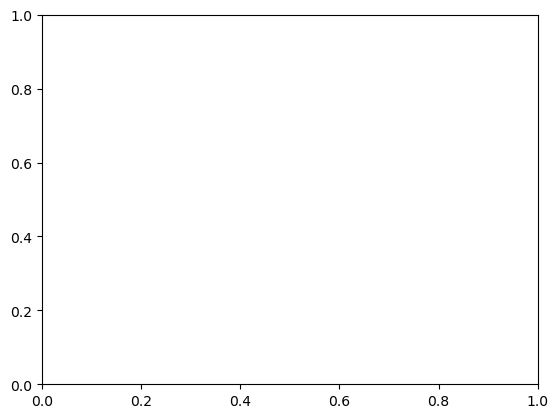

In [22]:
plt.figure()
plt.scatter(ziadi["time_since_planting"], ziadi["100"])
# plt.scatter(ziadi["time_since_planting"], ziadi["150"])
# plt.scatter(ziadi["time_since_planting"], ziadi["200"])
# plt.scatter(ziadi["time_since_plantng"], ziadi["250"])

DTypePromotionError: The DType <class 'numpy.dtypes.TimeDelta64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>)

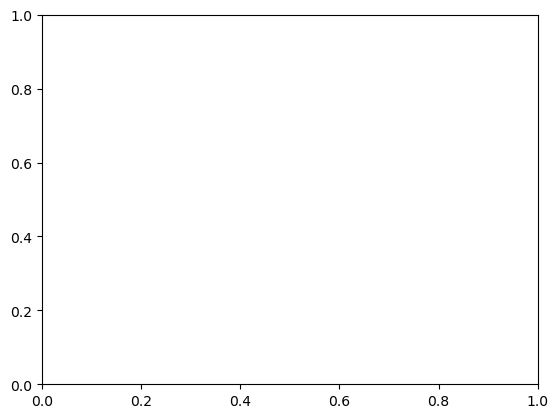

In [25]:
plt.scatter(ziadi["time_since_planting"], ziadi["100"])

In [6]:
ziadi_dates = np.array(["2004-07-06", "2004-07-13", "2004-07-20", "2004-07-27", "2004-08-02", "2004-08-09"], dtype=np.datetime64)
ziadi_dates

array(['2004-07-06', '2004-07-13', '2004-07-20', '2004-07-27',
       '2004-08-02', '2004-08-09'], dtype='datetime64[D]')

In [9]:
ziadi_200_biomass = np.array([1.44, 1.77, 5.16, 7.42, 10.30, 11.95]) * 100
ziadi_200_biomass

array([ 144.,  177.,  516.,  742., 1030., 1195.])

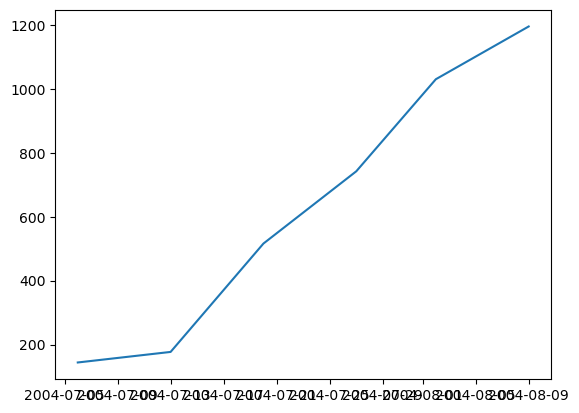

In [10]:
plt.plot(ziadi_dates, ziadi_200_biomass)

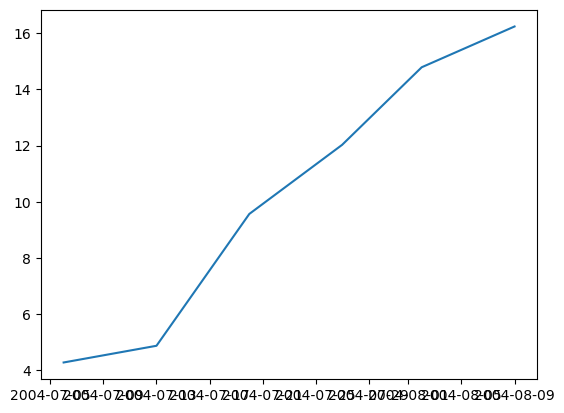

In [12]:
plt.plot(ziadi_dates, critical_nitrogen(ziadi_200_biomass))

In [34]:
np.diff(ziadi_dates)

array([7., 7., 7., 6., 7.])

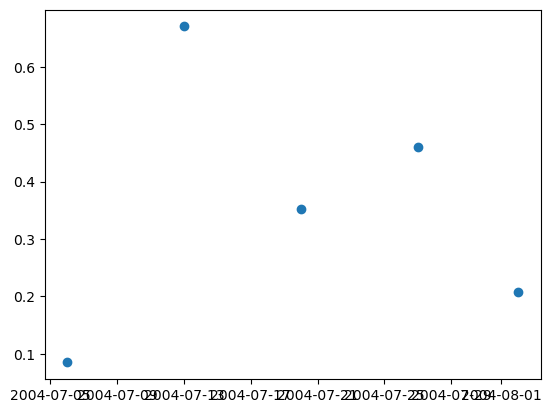

In [37]:
derivatives = np.diff(critical_nitrogen(ziadi_200_biomass)) / (np.diff(ziadi_dates) / np.timedelta64(1, 'D'))
plt.scatter(ziadi_dates[:-1], derivatives)